Task 1: HOUSE PRICE PREDICTION

Machine learning model to predict house price using linear regression.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [7]:
df = pd.read_csv(r'C:\Users\Bhaavya\Desktop\Bharat Intern\Housing.csv')

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Understanding the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Exploratory Data Analysis

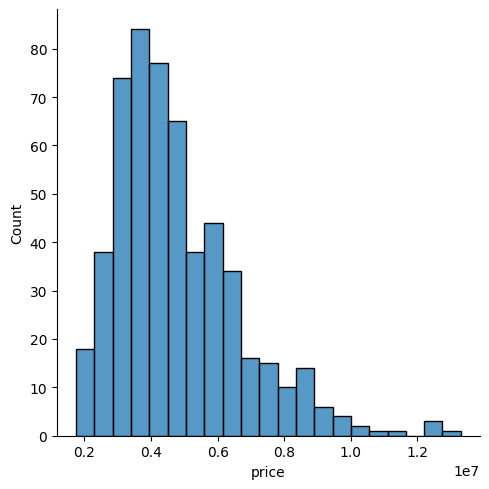

In [12]:
sns.displot(df['price'])

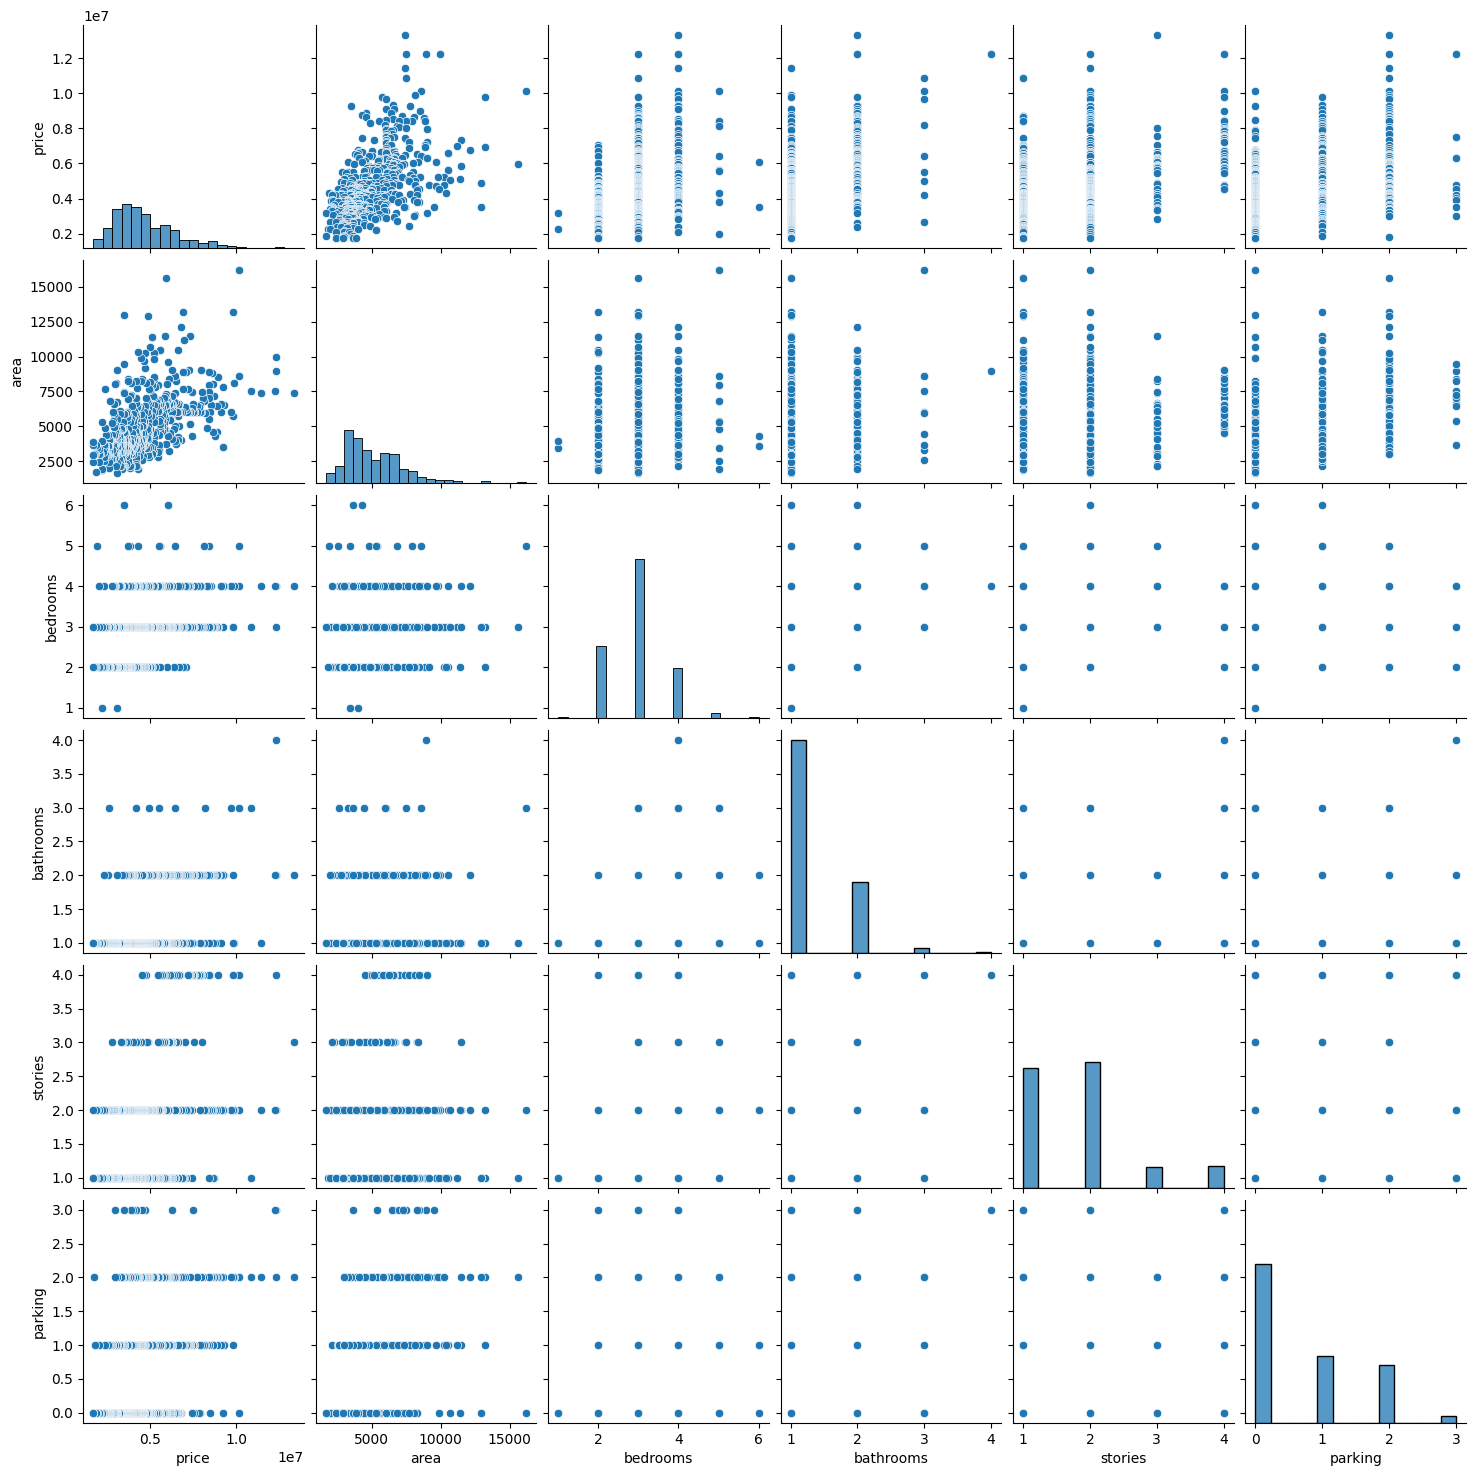

In [13]:
sns.pairplot(df)

From the above data we can conclude that relationship between each columns every columns

One Hot Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df[data] = df[data].apply(le.fit_transform)

In [15]:
print(df.corr())

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

<Axes: >

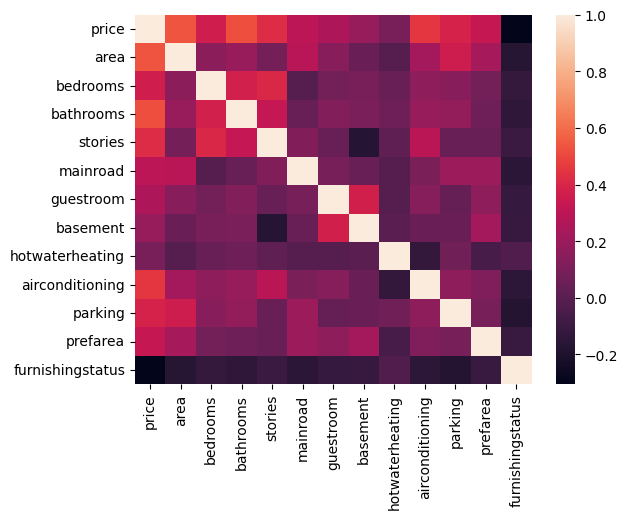

In [16]:
sns.heatmap(df.corr())

the above heatmap shows correlationship between each and every column.

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [18]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object

In [19]:
#Creating depedent_variable and independent_variable
X = df.drop(['price'], axis = 1)
y = df['price']

In [20]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 42)

In [21]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

Predicting House price using Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print(y_test_pred)

[5203691.70963178 7257004.02115476 3062828.59668171 4559591.65374424
 3332932.30559782 3563080.67918997 5645466.31219972 6413979.66873635
 2755831.54819    2668938.66075228 9570600.29915353 2827431.50860062
 3195686.2583409  3352263.99438471 3713879.49996132 5301088.24435749
 2987920.2666968  4810799.8212371  4383031.7048993  3525092.18938646
 5796259.50068013 5840000.70299301 2760214.608641   4762590.14920608
 5204755.73895206 7515542.71619025 3254681.68956382 5236164.45964444
 8178523.16820284 3434166.15675649 6443921.58767582 3346004.77919184
 6742324.74004133 4154936.84088665 3589152.47491252 5788125.92515323
 4768370.18154077 4391684.04193172 3217657.04549935 4638196.61928878
 4522160.27786714 3541284.06127245 7238136.11941171 4021515.68926614
 3701978.76822757 4298879.55563098 6705004.0206061  3993466.52296896
 3798185.05328059 3451821.5624289  7293996.86867461 2832905.26972678
 4378698.1476993  4468002.85418353 3714623.89765883 2718466.90282779
 7524449.64983626 2950437.1495281 

In [24]:
print(f"Intercept: {reg.intercept_}")

Intercept: 293083.06915066857


In [25]:
print(f"Coefficient: {reg.coef_}")

Coefficient: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]


In [26]:
price_prediction = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_test_pred.squeeze()})
print(price_prediction)

      Actual     Predicted
316  4060000  5.203692e+06
77   6650000  7.257004e+06
360  3710000  3.062829e+06
90   6440000  4.559592e+06
493  2800000  3.332932e+06
..       ...           ...
15   9100000  4.933137e+06
357  3773000  4.377133e+06
39   7910000  7.009335e+06
54   7350000  6.351461e+06
155  5530000  6.409340e+06

[109 rows x 2 columns]


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
import math
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))

In [29]:
print_metrics(y_train, y_train_pred)

MSE is 969902818698.3114
RMSE is 984836.4426128388
MAE is 718146.5977537859


In [30]:
r2 = r2_score(y_train, y_train_pred)
adj_r2=1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

r2:0.6854429472843789
Adj_r2:0.6765193429520209


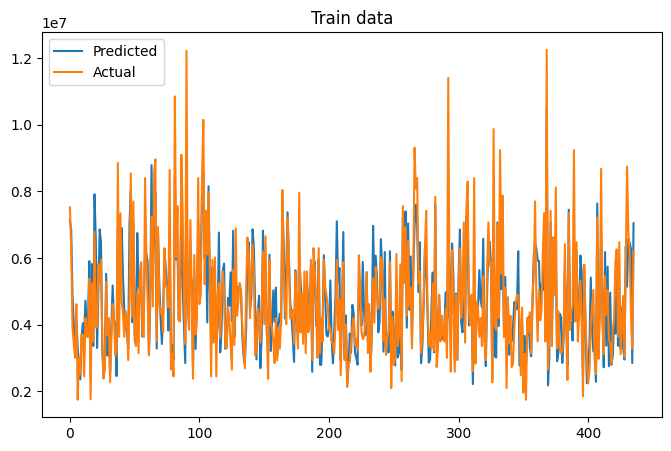

In [31]:
plt.figure(figsize=(8,5))
plt.title("Train data")
plt.plot(y_train_pred)
plt.plot(np.array(y_train))
plt.legend(["Predicted", "Actual"])
plt.show()

In [32]:
print_metrics(y_test, y_test_pred)

MSE is 1771751116594.0344
RMSE is 1331071.4167895103
MAE is 979679.6912959905


In [33]:
r2 = r2_score(y_test, y_test_pred)
adj_r2=1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"r2:{r2}")
print(f"Adj_r2:{adj_r2}")

r2:0.6494754192267804
Adj_r2:0.605659846630128


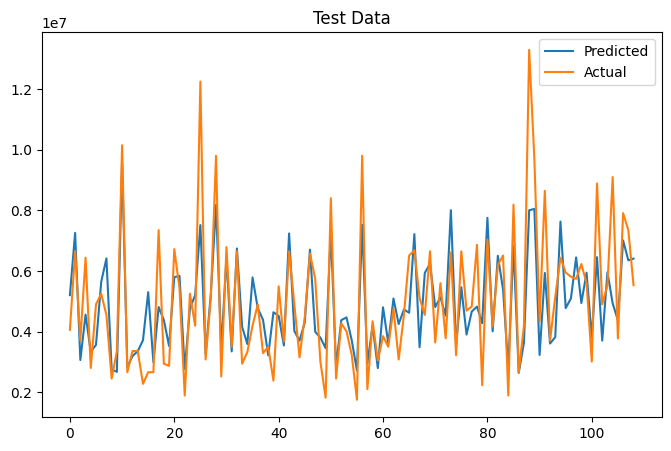

In [34]:
plt.figure(figsize=(8,5))
plt.title('Test Data')
plt.plot(y_test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()